## Exploratory Market Trend Analysis


In [28]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to explore stock market data!")

Libraries imported successfully!
Ready to explore stock market data!


## Load the Data

First, let's load the raw stock data that we collected.

In [29]:
# Load raw stock data
try:
    df = pd.read_csv('../data/raw/stock_data.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
    print(f"Stocks: {', '.join(df['Symbol'].unique())}")
except FileNotFoundError:
    print("Data file not found! Please run data_collector.py first.")
    print("Run this command in terminal: python data_collector.py")

Data loaded successfully!
Shape: (2510, 10)
Date range: 2023-08-01 to 2025-07-31
Stocks: AAPL, AMZN, GOOGL, MSFT, TSLA


C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_24556\2510623332.py:4: FutureWarning:

In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`



## Basic Data Overview

### Dataset Overview Insight

The dataset contains historical market data including price and volume information over a defined time period.
This structured time-series data enables analysis of market behavior, trends, and short-term fluctuations.

**Business interpretation:**  
A well-structured historical dataset is essential for understanding market dynamics and supports informed decision-making based on past performance patterns.


In [30]:
# Display basic information
print("Dataset Info:")
print("-" * 40)
df.info()

print("\nFirst few rows:")
print("-" * 40)
df.head()

Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2510 non-null   object 
 1   Symbol        2510 non-null   object 
 2   Open          2510 non-null   float64
 3   High          2510 non-null   float64
 4   Low           2510 non-null   float64
 5   Close         2510 non-null   float64
 6   Volume        2510 non-null   int64  
 7   Daily_Return  2505 non-null   float64
 8   Price_Range   2510 non-null   float64
 9   Volume_MA_20  2415 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 196.2+ KB

First few rows:
----------------------------------------


,Date,Symbol,Open,High,Low,Close,Volume,Daily_Return,Price_Range,Volume_MA_20
0,2023-08-01 00:00:00-04:00,AAPL,194.294673,194.779806,193.344183,193.670914,35175100,NaN,1.435623,NaN
1,2023-08-01 00:00:00-04:00,AMZN,133.550003,133.690002,131.619995,131.690002,42098500,NaN,2.070007,NaN
2,2023-08-01 00:00:00-04:00,GOOGL,130.000348,131.839326,129.900939,130.765762,23166800,NaN,1.938387,NaN
3,2023-08-01 00:00:00-04:00,MSFT,330.057739,333.356451,328.590563,331.190125,18311900,NaN,4.765889,NaN
4,2023-08-01 00:00:00-04:00,TSLA,266.260010,266.470001,260.250000,261.070007,83166000,NaN,6.220001,NaN


In [31]:
# Statistical summary
print("Statistical Summary:")
print("-" * 40)
df.describe()

Statistical Summary:
----------------------------------------


,Open,High,Low,Close,Volume,Daily_Return,Price_Range,Volume_MA_20
count,2510.000000,2510.000000,2510.000000,2510.000000,2.510000e+03,2505.000000,2510.000000,2.415000e+03
mean,241.662274,244.656922,238.614588,241.738430,5.131842e+07,0.000949,6.042334,5.128063e+07
std,97.503034,98.417015,96.449886,97.475335,3.606737e+07,0.023836,4.949986,3.073308e+07
min,120.629997,121.639999,118.349998,119.570000,7.164500e+06,-0.154262,0.949997,1.594421e+07
25%,173.714903,176.003245,171.982815,173.962700,2.503482e+07,-0.009781,3.022748,2.612944e+07
50%,204.039993,206.654999,200.780006,204.201035,4.068675e+07,0.001254,4.549507,4.340113e+07
75%,298.232491,305.792511,289.692497,296.652504,6.464620e+07,0.011244,7.205318,6.170729e+07
max,555.229980,555.450012,531.900024,533.500000,3.186799e+08,0.226900,61.529999,1.511215e+08


## Market Price Movement Analysis


Let's create some beautiful charts to understand price movements.

In [32]:
# Create price comparison chart
fig = go.Figure()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, symbol in enumerate(df['Symbol'].unique()):
    symbol_data = df[df['Symbol'] == symbol].sort_values('Date')
    
    fig.add_trace(go.Scatter(
        x=symbol_data['Date'],
        y=symbol_data['Close'],
        mode='lines',
        name=symbol,
        line=dict(color=colors[i % len(colors)], width=2)
    ))

fig.update_layout(
    title='Stock Price Comparison Over Time',
    xaxis_title='Date',
    yaxis_title='Price ($)',
    hovermode='x unified',
    height=600
)

fig.show()

### Price Movement Insight

The price visualization highlights how the market value evolves over time, capturing both long-term trends and short-term fluctuations.
Sharp movements indicate strong market reactions, while stable periods suggest balanced trading activity.

**Business interpretation:**  
Price trends help investors identify growth phases, consolidation zones, and potential reversal points.
Such insights assist in timing entry and exit decisions more effectively.


## Trading Volume Pattern Analysis


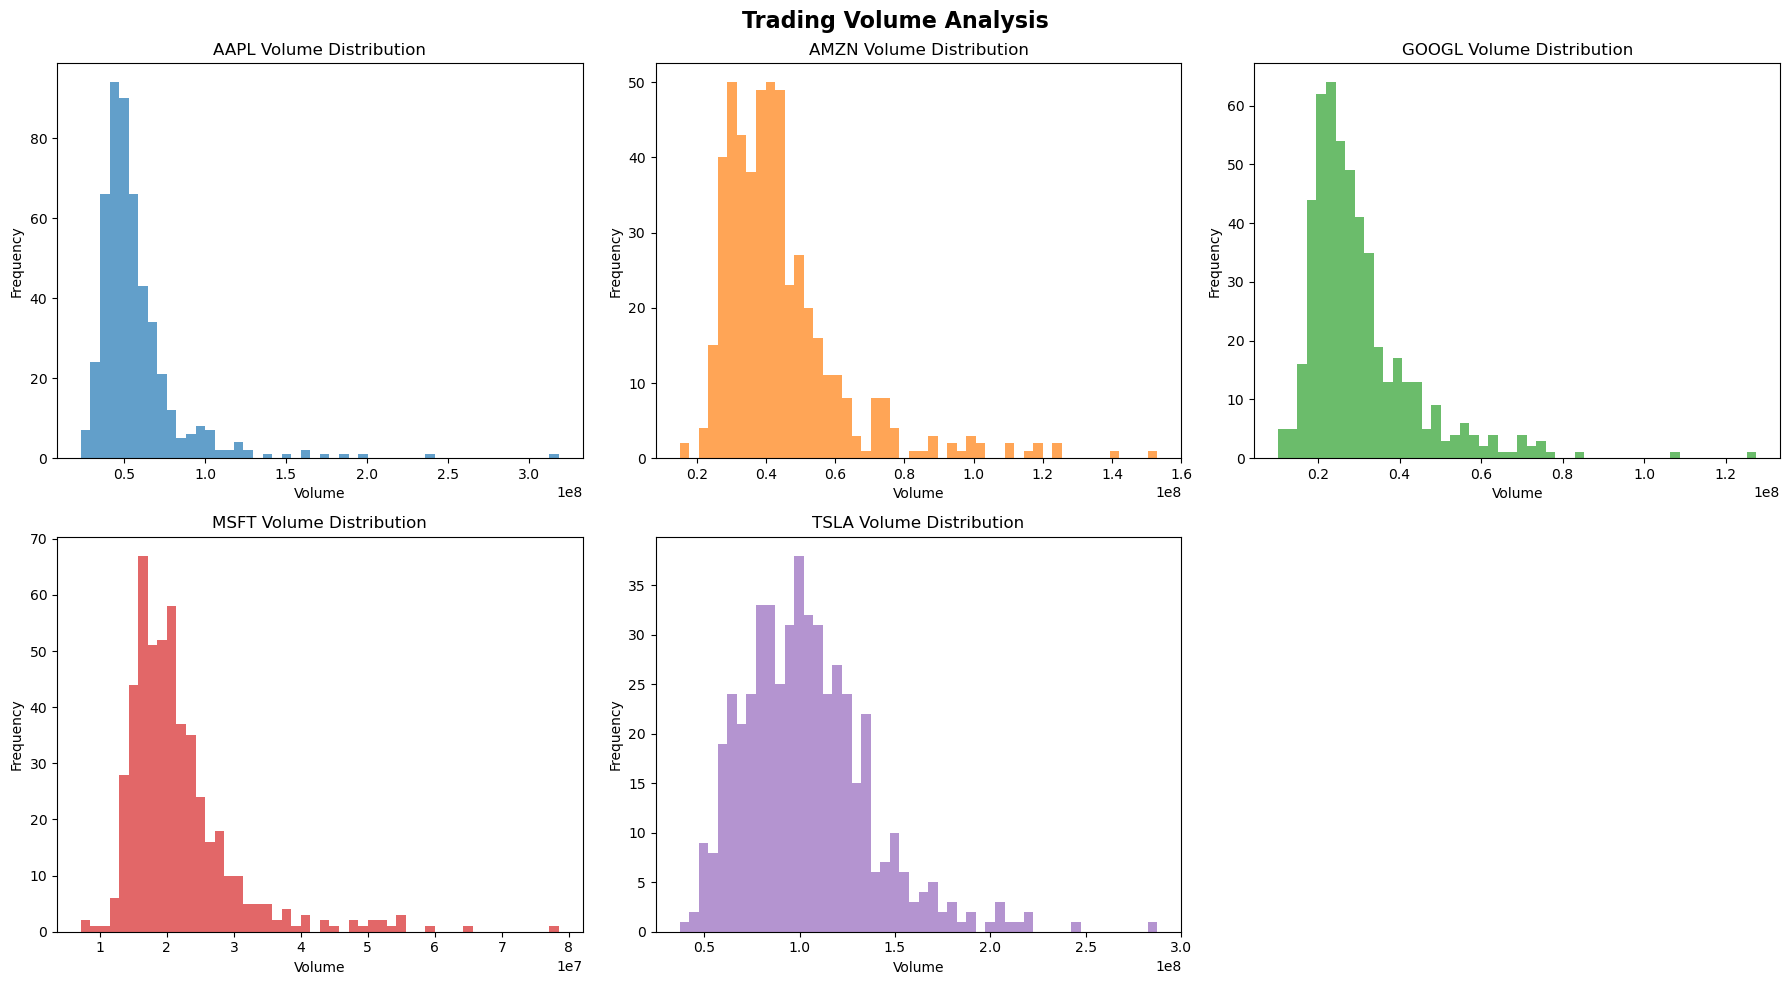

In [33]:
# Volume analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Trading Volume Analysis', fontsize=16, fontweight='bold')

symbols = df['Symbol'].unique()

for i, symbol in enumerate(symbols):
    row = i // 3
    col = i % 3
    
    if row < 2 and col < 3:
        symbol_data = df[df['Symbol'] == symbol]
        
        axes[row, col].hist(symbol_data['Volume'], bins=50, alpha=0.7, color=colors[i])
        axes[row, col].set_title(f'{symbol} Volume Distribution')
        axes[row, col].set_xlabel('Volume')
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

if len(symbols) < 6:
    fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

### Trading Volume Insight

Trading volume reflects the level of market participation during different time periods.
Spikes in volume often coincide with major price movements, indicating strong buying or selling pressure.

**Business interpretation:**  
High trading volume strengthens the reliability of price trends, while low volume may signal weak market conviction.
Volume analysis helps validate price movements and assess market interest.


## Short-Term Return Behavior Analysis


C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_24556\2170270778.py:15: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



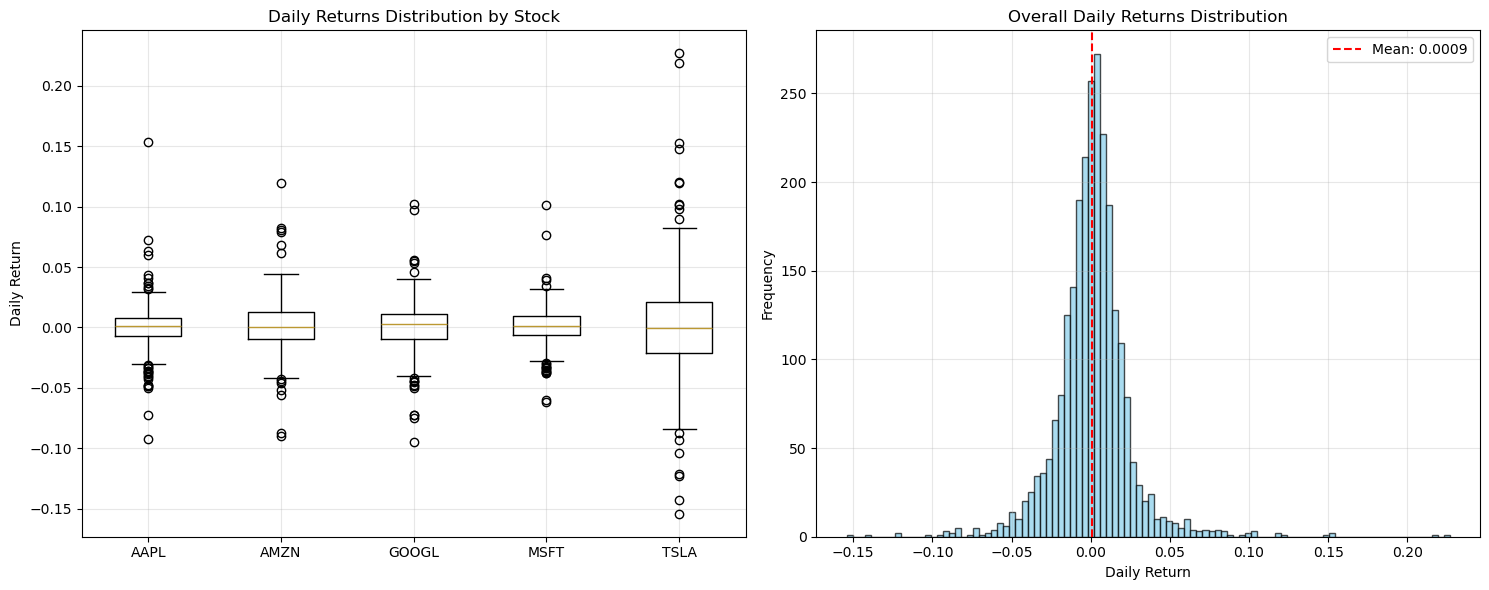

Daily Returns Statistics:
----------------------------------------
        Mean Return  Volatility  Min Return  Max Return
Symbol                                                 
AAPL         0.0003      0.0173     -0.0925      0.1533
AMZN         0.0013      0.0196     -0.0898      0.1198
GOOGL        0.0009      0.0186     -0.0951      0.1022
MSFT         0.0011      0.0142     -0.0618      0.1013
TSLA         0.0011      0.0402     -0.1543      0.2269


In [37]:
# Calculate daily returns
df['Daily_Return'] = df.groupby('Symbol')['Close'].pct_change()

# Create returns distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

returns_data = []
labels = []

for symbol in df['Symbol'].unique():
    symbol_returns = df[df['Symbol'] == symbol]['Daily_Return'].dropna()
    returns_data.append(symbol_returns)
    labels.append(symbol)

axes[0].boxplot(returns_data, labels=labels)
axes[0].set_title('Daily Returns Distribution by Stock')
axes[0].set_ylabel('Daily Return')
axes[0].grid(True, alpha=0.3)

all_returns = df['Daily_Return'].dropna()
axes[1].hist(all_returns, bins=100, alpha=0.7, color='skyblue', edgecolor='black')
axes[1].axvline(all_returns.mean(), color='red', linestyle='--', label=f'Mean: {all_returns.mean():.4f}')
axes[1].set_title('Overall Daily Returns Distribution')
axes[1].set_xlabel('Daily Return')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Daily Returns Statistics:")
print("-" * 40)
returns_stats = df.groupby('Symbol')['Daily_Return'].agg(['mean', 'std', 'min', 'max'])
returns_stats.columns = ['Mean Return', 'Volatility', 'Min Return', 'Max Return']
print(returns_stats.round(4))

## Short-Term Return Behavior Analysis


Daily return analysis captures short-term percentage changes in market price, highlighting volatility and risk.
Frequent fluctuations around zero indicate a dynamic and reactive market environment.

**Business interpretation:**  
Daily returns help quantify risk and assess short-term performance.
This information is useful for traders and analysts focusing on short-term strategies and risk exposure management.


## Market Risk and Volatility Assessment


In [35]:
df = df.sort_values(['Symbol', 'Date'])

df['Volatility_30'] = (
    df.groupby('Symbol')['Daily_Return']
      .transform(lambda x: x.rolling(window=30).std())
      * np.sqrt(252)
)

fig = go.Figure()

for i, symbol in enumerate(df['Symbol'].unique()):
    symbol_data = df[df['Symbol'] == symbol]

    fig.add_trace(go.Scatter(
        x=symbol_data['Date'],
        y=symbol_data['Volatility_30'],
        mode='lines',
        name=f'{symbol} Volatility',
        line=dict(color=colors[i % len(colors)], width=2)
    ))

fig.update_layout(
    title='30-Day Rolling Volatility (Annualized)',
    xaxis_title='Date',
    yaxis_title='Volatility',
    hovermode='x unified',
    height=500
)

fig.show()


### 📈Market Risk and Volatility Assessment


The 30-day rolling volatility shows periods of heightened market uncertainty, particularly during sharp price movements.
Spikes in volatility indicate increased risk and unstable price behavior.

**Business interpretation:**  
High-volatility periods are suitable for short-term trading strategies, while low-volatility phases favor long-term investment decisions.
Risk-aware portfolio allocation is recommended during volatile intervals.


## Key Insights and Next Steps

Based on your data exploration, here are some key insights:

In [36]:
# Generate insights
print("KEY INSIGHTS FROM YOUR DATA:")
print("=" * 50)

# Data quality
missing_data = df.isnull().sum().sum()
print(f"Data Quality: {len(df):,} total rows, {missing_data} missing values")

# Volatility ranking
volatility_ranking = df.groupby('Symbol')['Daily_Return'].std().sort_values(ascending=False)
print(f"\nMost Volatile Stock: {volatility_ranking.index[0]} ({volatility_ranking.iloc[0]:.4f})")
print(f"Least Volatile Stock: {volatility_ranking.index[-1]} ({volatility_ranking.iloc[-1]:.4f})")

# Best performer
total_returns = df.groupby('Symbol').apply(lambda x: (x['Close'].iloc[-1] / x['Close'].iloc[0] - 1))
total_returns = total_returns.sort_values(ascending=False)
print(f"\nBest Performer: {total_returns.index[0]} ({total_returns.iloc[0]:.2%} total return)")
print(f"Worst Performer: {total_returns.index[-1]} ({total_returns.iloc[-1]:.2%} total return)")

KEY INSIGHTS FROM YOUR DATA:
Data Quality: 2,510 total rows, 250 missing values

Most Volatile Stock: TSLA (0.0402)
Least Volatile Stock: MSFT (0.0142)

Best Performer: AMZN (77.77% total return)
Worst Performer: AAPL (7.18% total return)


C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_24556\694870187.py:15: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

